In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import   Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [3]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/df_total.csv")

In [4]:
df.head()

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [5]:
df['targets'] = df['Type'].astype("category").cat.codes

In [6]:
df

,url,news,Type,targets
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,3
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,4
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,0
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,2
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,3
...,...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion,1
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia,2
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas,0
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion,1


In [7]:
K = df['targets'].max() +1

In [8]:
df_train, df_test = train_test_split(df, test_size = 0.3)

In [10]:
# Convert sentences in sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(df_train["news"])
# fit_on_texts: cette méthode analyse un ensemble de textes (la colonne
# news de df_train) et met à jour un dictionnaire interne du tokenizer
# contenant les mots et leur fréquence.
# Elle assigne un index unique à chaque mot basé sur sa fréquence
# d'apparition (les mots les plus fréquents obtiennent les indices les plus
# petits).

#ex:
#texts = ["Bonjour tout le monde", "Bonjour à tous"]
#tokenizer.fit_on_texts(texts)
#print(tokenizer.word_index)
# {'bonjour': 1, 'tout': 2, 'le': 3, 'monde': 4, 'à': 5, 'tous': 6}


sequences_train = tokenizer.texts_to_sequences(df_train["news"])
sequences_test = tokenizer.texts_to_sequences(df_test["news"])

# Cette commande convertit les textes présents dans la colonne news de votre
# DataFrame df_train en séquences numériques à l'aide du tokenizer. Chaque
# mot dans le texte est remplacé par son index numérique selon le dictionnaire
# interne du tokenizer.
# C'est donc la suite logique de la commande precedente

# sequences_train est une liste de listes, où chaque sous-liste correspond à
# une séquence de nombres représentant un texte. Les textes sont ainsi
# encodés sous une forme compréhensible pour un modèle d'apprentissage
# automatique, car les modèles de deep learning ne traitent que des données
# numériques. %%

In [13]:
sequences_train #liste de listes

Output hidden; open in https://colab.research.google.com to view.

In [11]:
word2idx = tokenizer.word_index
# assigne le dictionnaire de mots-index interne du tokenizer à la variable
# word2idx. Ce dictionnaire mappe chaque mot unique de votre corpus à un index
# numérique, basé sur la fréquence des mots.

V = len(word2idx)
print(f'there are {V} tokens')


there are 25559 tokens


In [12]:
word2idx
# remind that the lower the indice, the most frequent it is.

{'de': 1,
 'la': 2,
 'en': 3,
 'el': 4,
 'que': 5,
 'y': 6,
 'a': 7,
 'los': 8,
 'las': 9,
 'del': 10,
 'para': 11,
 'se': 12,
 'un': 13,
 'con': 14,
 'por': 15,
 'una': 16,
 'es': 17,
 'más': 18,
 'al': 19,
 'como': 20,
 'su': 21,
 '\r': 22,
 'no': 23,
 'bbva': 24,
 'ha': 25,
 'lo': 26,
 'este': 27,
 'sus': 28,
 'o': 29,
 'esta': 30,
 'año': 31,
 'inflación': 32,
 'entre': 33,
 'desde': 34,
 'también': 35,
 'empresas': 36,
 'banco': 37,
 'son': 38,
 'millones': 39,
 'sobre': 40,
 'han': 41,
 'precios': 42,
 'país': 43,
 'colombia': 44,
 'clientes': 45,
 'está': 46,
 'pero': 47,
 'ya': 48,
 'crecimiento': 49,
 'parte': 50,
 'mayor': 51,
 'sin': 52,
 'así': 53,
 'hasta': 54,
 'además': 55,
 'mercado': 56,
 'energía': 57,
 'años': 58,
 'ser': 59,
 'según': 60,
 'muy': 61,
 'sector': 62,
 'durante': 63,
 'datos': 64,
 'servicios': 65,
 'si': 66,
 'e': 67,
 'tiene': 68,
 '000': 69,
 'cada': 70,
 'través': 71,
 'productos': 72,
 'países': 73,
 'dos': 74,
 'están': 75,
 'economía': 76,
 'mun

In [14]:
# Fill the sequence (Padding)
# Pour que toutes les séquences aient la même longueur, on utilise le padding :
data_train = pad_sequences(sequences_train)

In [16]:
data_train # liste de listes, avec 0 avant pour que toutes aient la meme taille

array([[   0,    0,    0, ...,    4,  142,  513],
       [   0,    0,    0, ..., 2337,    6,  445],
       [   0,    0,    0, ...,    6,    2, 1566],
       ...,
       [   0,    0,    0, ...,    2,  167,  116],
       [   0,    0,    0, ...,   18,  240,  978],
       [   0,    0,    0, ...,    1,    2, 3507]], dtype=int32)

In [19]:
data_train.shape #851 news in df_train
#2925 words in each sequence

(851, 2925)

In [29]:
T = data_train.shape[1] # longitud of the sequence aka size of each row


In [30]:
data_test = pad_sequences(sequences_test, maxlen = T)
data_test.shape

(366, 2925)

In [32]:
D = 50  # Dimension of the embedding (arbitrary)

i = Input(shape=(T,))
#Input : Définit une couche d'entrée pour le modèle.
#shape=(T,) : Spécifie que l'entrée sera une séquence de longueur
# T entier). Chaque entier correspond généralement à un token dans une
# séquence (par exemple, un mot ou un sous-mot).
# Cette couche attend des données encodées sous forme d'indices numériques,
# par exemple obtenus via un tokenizer.


x = Embedding(V+1,D)(i)#the +1 is generally used to include a specific token
# Transforme les indices entiers en vecteurs denses continus. C'est essentiel
# pour représenter des tokens dans un espace vectoriel.
#V+1 : Taille du vocabulaire plus 1 (le +1 est souvent utilisé pour inclure un token spécial, comme <PAD> ou <UNK>).
#D : Dimensionnalité des vecteurs d'embedding.
#Entrée : Une séquence d'indices [x1,...,xT] de taille T.
#Sortie : Une matrice d'embedding de forme(T,D)
#(T,D), où chaque token est représenté par un vecteur dense de taille D.

x = Conv1D(32,3, activation = "relu")(x)
# Conv1D : Applique une convolution sur la séquence. Cela permet de capturer
# les motifs locaux (relations entre mots voisins) dans la séquence.
#32 : Nombre de filtres (dimensions de sortie).
#3 : Taille du noyau (ou "kernel size"). Ici, la fenêtre glisse sur 3 mots consécutifs à chaque étape.
#activation="relu" : Fonction d'activation ReLU, couramment utilisée pour introduire la non-linéarité.
#Entrée : Une matrice (T,D)
#Sortie : Une matrice (𝑇−3+1,32) (la taille diminue en fonction de la taille du noyau, sauf si un padding est utilisé).
x = GlobalMaxPooling1D()(x)
#GlobalMaxPooling1D : Effectue une réduction sur la dimension temporelle (longueur de la séquence). Pour chaque filtre, elle sélectionne le maximum parmi toutes les positions.
#Cela permet d'extraire les caractéristiques les plus importantes détectées par chaque filtre, indépendamment de leur position dans la séquence.
#Entrée : Une matrice (𝑇−3+1,32).
#Sortie : Un vecteur(32,), où chaque entrée correspond au maximum d’un filtre.

# Résumé du pipeline
#Entrée : Une séquence de longueur T (indices numériques des tokens).
#Embedding : Transforme chaque indice en un vecteur dense, produisant une matrice de taille (T,D).
#Convolution 1D : Capture les relations locales entre les mots avec des filtres, produisant une matrice (T−3+1,32).
#Global Max Pooling : Réduit chaque filtre à un seul maximum, produisant un vecteur de caractéristiques(32,).

In [33]:
x = Dense(K)(x)
model = Model(i,x)

In [35]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model.fit(data_train,df_train['targets'],
              epochs = 50,
              validation_data=(data_test, df_test['targets'])
              )


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.1984 - loss: 1.9303 - val_accuracy: 0.4016 - val_loss: 1.7834
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.5171 - loss: 1.6820 - val_accuracy: 0.4781 - val_loss: 1.5500
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.4897 - loss: 1.4242 - val_accuracy: 0.5546 - val_loss: 1.3113
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.5930 - loss: 1.1531 - val_accuracy: 0.6120 - val_loss: 1.1067
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.7355 - loss: 0.9517 - val_accuracy: 0.6831 - val_loss: 0.9727
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.8351 - loss: 0.7419 - val_accuracy: 0.7295 - val_loss: 0.8676
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.8735 - loss: 0.6341 - val_accuracy: 0.8060 - val_loss: 0.7619
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9346 - loss: 0.4640 - val_accuracy: 0

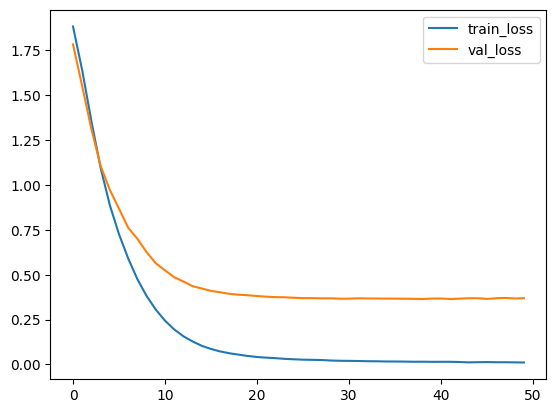

In [36]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

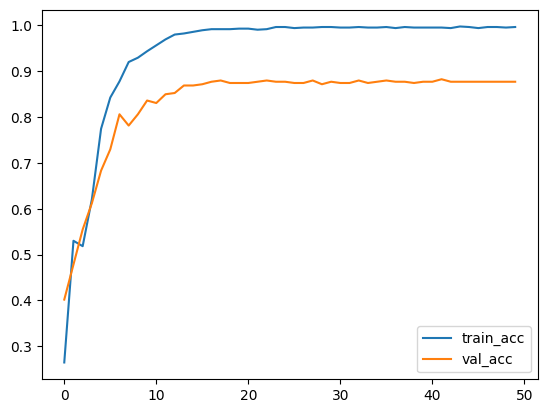

In [37]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()